In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plp

### Enunciado

Obtener del sitio web del DANE (http://www.dane.gov.co/) la estimación de la población de Colombia para el año 2017 por municipios y del sitio de Datos Abiertos de Colombia (https://www.datos.gov.co/) los datos del Directorio de la Red Nacional de Bibliotecas Públicas . Realizar los siguientes procedimientos y análisis:
<ol>
    <li> Organizar cada tabla en una hoja de Excel de Microsoft, una para cada grupo de datos, leer los datos y guardarlos en dos Data Frame distintos usando Pandas de Python. </li>
    <li> Crear un nuevo Data Frame a partir de los dos creados en el punto anterior con un registro por cada municipio, y con las columnas de Nombre (Nombre del Municipio), Departamento (Departamento del municipio), Población (Población proyectada para el año 2017) y número de bibliotecas abiertas </li>
    <li> Crear una tabla de frecuencia utilizando los rangos definidos de acuerdo al número de Bibliotecas abiertas en el municipio (Cada pareja de estudiantes debe definir el número de rangos entre 4 y 6 categorías). Realizar un diagrama de barras usando esta tabla de frecuencias.</li>    
    <li> Clasificar los municipios de acuerdo al tamaño de su población en 5 categorías (es libre la definición de los rangos). Agregar una columna al Data Frame creado en el punto dos con esta clasificación. Usando este último Data Frame, calcular la media, desviación estándar, primer y tercer cuartil del del número de Bibliotecas por cada una de las clasificaciones de los municipios acordes al tamaño de la población.</li>
    <li>Que conclusiones puede deducir entre la relación del del número de Bibliotecas y el tamaño de los municipios a partir de los resultados del punto anterior.</li>
</ol>

### Respuesta

#### 1. Se obtuvo del sitio web del DANE (http://www.dane.gov.co/) la estimación de la población de Colombia para el año 2017 por municipios y del sitio de Datos Abiertos de Colombia (https://www.datos.gov.co/) los datos del Directorio de la Red Nacional de Bibliotecas Públicas. 

#### Organizar cada tabla en una hoja de Excel de Microsoft, una para cada grupo de datos, leer los datos y guardarlos en dos Data Frame distintos usando Pandas de Python. Se organizaron las tablas en Excel, estas dos tablas se leen y acontinuación se muestran los tamaños de los Data Frames resultantes y los primeros 10 registros de cada *DataFrame*

In [2]:
poblacion=pd.read_excel("poblacion2017.xlsx",index=True)
bibliotecas=pd.read_excel("bibliotecas.xlsx",index=True)
print(poblacion.shape)
print(bibliotecas.shape)

(1122, 4)
(1455, 9)


#### Para la tabla población se definieron cuatro columnas: departamento, código del municipio, nombre del municipio y tamaño de la población

In [3]:
poblacion.head(10)

,Departamento,Codigo,Municipio,Poblacion
0,Antioquia,5001,Medellín,2508452
1,Antioquia,5002,Abejorral,19096
2,Antioquia,5004,Abriaquí,2019
3,Antioquia,5021,Alejandría,3393
4,Antioquia,5030,Amagá,29980
5,Antioquia,5031,Amalfi,22414
6,Antioquia,5034,Andes,46621
7,Antioquia,5036,Angelópolis,9216
8,Antioquia,5038,Angostura,11139
9,Antioquia,5040,Anorí,17521


#### En la tabla para las bibliotecas se definieron las columnas código del municipio, departamento, nombre del municipio, nombre del centro poblado, tipo de biblioteca, nombre, estado y georeferenciación

In [4]:
bibliotecas.head(10)

,Codigo,Departamento,Municipio,CentroPoblado,Naturaleza,Tipo,Nombre,Estado,Georeferencia
0,91001000,AMAZONAS,LETICIA,LETICIA,ESTATAL,MUNICIPAL,BIBLIOTECA PÚBLICA MUNICIPAL DE LETICIA,ABIERTA,"(-4.2031650°,-69.9359070°)"
1,91530000,AMAZONAS,PUERTO ALEGRIA,PUERTO ALEGRÍA,ESTATAL,RURAL,BIBLIOTECA PÚBLICA DE PUERTO ALEGRIA,ABIERTA,"(-1.0056436°,-74.0157723°)"
2,91540000,AMAZONAS,PUERTO NARIÑO,PUERTO NARIÑO,ESTATAL,MUNICIPAL,BIBLIOTECA PÚBLICA MUNICIPAL POPERAPATA,ABIERTA,"(-3.7733333°,-70.3819444°)"
3,5002000,ANTIOQUIA,ABEJORRAL,ABEJORRAL,ESTATAL,MUNICIPAL,"BIBLIOTECA PÚBLICA MUNICIPAL DE ABEJORRAL ""JAI...",ABIERTA,"(5.7916768°,-75.4282028°)"
4,5004000,ANTIOQUIA,ABRIAQUI,ABRIAQUÍ,ESTATAL,MUNICIPAL,BIBLIOTECA PÚBLICA MUNICIPAL DAVID CASTRO LÓPEZ,ABIERTA,"(6.8867393°,-75.3351273°)"
5,5021000,ANTIOQUIA,ALEJANDRIA,ALEJANDRÍA,ESTATAL,MUNICIPAL,BIBLIOTECA PÚBLICA ALEJANDRO OSORIO CASA DE LA...,ABIERTA,"(6.3770122°,-75.1403026°)"
6,5030000,ANTIOQUIA,AMAGA,AMAGÁ,ESTATAL,MUNICIPAL,"BIBLIOTECA PÙBLICA MUNICIPAL ""EMIRO KASTOS""",ABIERTA,"(6.0398343°,-75.7040737°)"
7,5031000,ANTIOQUIA,AMALFI,AMALFI,ESTATAL,MUNICIPAL,BIBLIOTECA PÚBLICA MUNICIPAL DE AMALFI,ABIERTA,"(6.9079500°,-75.0761500°)"
8,5034000,ANTIOQUIA,ANDES,ANDES,ESTATAL,MUNICIPAL,BIBLIOTECA PÚBLICA GONZALO ARANGO ARIAS,ABIERTA,"(5.6581043°,-75.8775382°)"
9,5036000,ANTIOQUIA,ANGELOPOLIS,ANGELÓPOLIS,ESTATAL,MUNICIPAL,BIBLIOTECA PÚBLICA MUNICIPAL ERNESTO BETANCUR,ABIERTA,"(6.1096610°,-75.7118080°)"


#### 2. Crear un nuevo Data Frame a partir de los dos creados en el punto anterior con un registro por cada municipio, y con las columnas de Nombre (Nombre del Municipio), Departamento (Departamento del municipio), Población (Población proyectada para el año 2017) y número de bibliotecas abiertas (20 puntos)

#### Se utilizó el código del municipio para realizar el conteo de las bibliotecas por municipio y luego se agregó las columnas pedidas.

In [5]:
def extraerCodigo(codigoPrueba2):
    texto=""
    if(len(str(codigoPrueba2))==7):
        texto= str(codigoPrueba2)[:4]
    else:    
        texto= str(codigoPrueba2)[:5]
    return texto    

In [6]:
bibliotecas["NCodigo"]=bibliotecas["Codigo"].apply(lambda x: extraerCodigo(x))

In [7]:
bibliotecasCodigo=bibliotecas[bibliotecas["Estado"]=="ABIERTA"].groupby("NCodigo").count()

In [8]:
codigoBiblioteca=[]
departamentoBiblioteca=[]
municipioBiblioteca=[]
numeroBiblioteca=[]
poblacionBiblioteca=[]
for indice in bibliotecasCodigo.index:    
    municipio=poblacion[poblacion.Codigo==int(indice)][["Municipio","Poblacion","Departamento"]]    
    if municipio.shape[0]>0:        
        #print indice," ",municipio.values[0][0]," ",municipio.values[0][1]
        codigoBiblioteca.append(indice)
        municipioBiblioteca.append(municipio.values[0][0])
        poblacionBiblioteca.append(municipio.values[0][1])
        numeroBiblioteca.append(bibliotecasCodigo.loc[indice][0])
        departamentoBiblioteca.append(municipio.values[0][2])
    else:
        print("No encontrado ",indice)    

In [9]:
datos1=pd.DataFrame({"Codigo":codigoBiblioteca,"Municipio":municipioBiblioteca,
                    "Departamento":departamentoBiblioteca,"Poblacion":poblacionBiblioteca,
                     "Numero":numeroBiblioteca})

#### Se muestran las diez primeras filas para la nueva tabla creada y el tamaño de la nueva tabla

In [10]:
datos1.head(10)

,Codigo,Municipio,Departamento,Poblacion,Numero
0,11001,"Bogotá, D.C.","Bogotá, D.C.",8080734,19
1,13001,Cartagena,Bolívar,1024882,17
2,13006,Achí,Bolívar,23851,1
3,13030,Altos del Rosario,Bolívar,14215,1
4,13042,Arenal,Bolívar,19743,1
5,13052,Arjona,Bolívar,75271,1
6,13062,Arroyohondo,Bolívar,10174,1
7,13074,Barranco de Loba,Bolívar,18426,1
8,13140,Calamar,Bolívar,23928,1
9,13160,Cantagallo,Bolívar,9556,1


In [11]:
datos1.shape

(1094, 5)

#### Se comprueba que hay 1099 registros diferentes y que la suma del número de bibliotecas es de 1455 igual al número de registros originales de la tabla bibliotecas.

#### 3. Crear una tabla de frecuencia utilizando los rangos definidos de acuerdo al número de Bibliotecas abiertas en el municipio (Cada pareja de estudiantes debe definir el número de rangos entre 4 y 6 categorías).  Realizar un diagrama de barras usando esta tabla de frecuencias. 

#### Para realizar la tabla de frecuencias se utilizan 5 categorías para el número de bibliotecas que se definen en el vector bins_limits

In [12]:
bins_limits=[0,2,5,10,100]
intervals_name=[]
for i in range(len(bins_limits)-1):
    lim_inf=bins_limits[i]
    lim_sup=bins_limits[i+1]
    label='['+str(lim_inf)+","+str(lim_sup)+")"
    intervals_name.append(label)
Nbibliotecas=datos1['Numero']
x_freq,x_bins=np.histogram(Nbibliotecas,bins_limits)
dataFrameP3=pd.DataFrame.from_items([('Intervalos',intervals_name),('Frecuencia',x_freq)])

C:\Users\PORTATIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  # Remove the CWD from sys.path while we load stuff.


#### A continuacion se muestra la tabla de frecuencias

In [13]:
dataFrameP3

,Intervalos,Frecuencia
0,"[0,2)",952
1,"[2,5)",127
2,"[5,10)",9
3,"[10,100)",6


#### Se comprueba que las frecuencias sumen en número de observaciones

In [14]:
dataFrameP3.sum()

Intervalos    [0,2)[2,5)[5,10)[10,100)
Frecuencia                        1094
dtype: object

#### El diagrama de barras correspondiente es

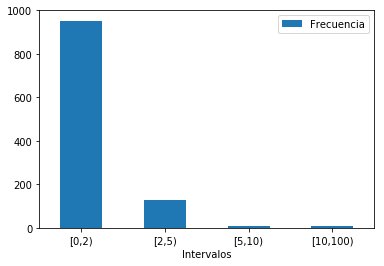

In [15]:
%matplotlib inline
dataFrameP3.plot.bar(x='Intervalos', y='Frecuencia', rot=0)

#### 4. Clasificar los municipios de acuerdo al tamaño de su población en 5 categorías (es libre la definición de los rangos). Agregar una columna al Data Frame creado en el punto dos con esta clasificación. Usando este último Data Frame,  calcular la media, desviación estándar, primer y tercer cuartil del del número de Bibliotecas por cada una de las clasificaciones de los municipios acordes al tamaño de la población.

#### Se clasífican los municipios es 5 categorías de 0-5 000, 5 000-10 000, 10 000-100 000, 100 000-1 000 000 y de 1 000 000 - 9 000 000 habitantes

In [16]:
lim1=0
lim2=5001
lim3=10001
lim4=100001
lim5=1000001
lim6=10000001

datos1["categoria"]=np.zeros(datos1.shape[0]).tolist()
datos1.loc[(datos1.Poblacion>lim1)&(datos1.Poblacion<=lim2),["categoria"]]=1
datos1.loc[(datos1.Poblacion>lim2)&(datos1.Poblacion<=lim3),["categoria"]]=2
datos1.loc[(datos1.Poblacion>lim3)&(datos1.Poblacion<=lim4),["categoria"]]=3
datos1.loc[(datos1.Poblacion>lim4)&(datos1.Poblacion<=lim5),["categoria"]]=4
datos1.loc[(datos1.Poblacion>lim5)&(datos1.Poblacion<=lim6),["categoria"]]=5

#### Se muestran las primeras filas de tabla modificada

In [17]:
datos1.head()

,Codigo,Municipio,Departamento,Poblacion,Numero,categoria
0,11001,"Bogotá, D.C.","Bogotá, D.C.",8080734,19,5.0
1,13001,Cartagena,Bolívar,1024882,17,5.0
2,13006,Achí,Bolívar,23851,1,3.0
3,13030,Altos del Rosario,Bolívar,14215,1,3.0
4,13042,Arenal,Bolívar,19743,1,3.0


#### Se calcula la media, desviación estándar, primer y tercer cuartil por categoria

In [18]:
datos1.groupby("categoria")["Numero"].describe()

,count,mean,std,min,25%,50%,75%,max
categoria,,,,,,,,
1.0,166.0,1.030120,0.171436,1.0,1.0,1.0,1.0,2.0
2.0,251.0,1.051793,0.222051,1.0,1.0,1.0,1.0,2.0
3.0,615.0,1.186992,0.534625,1.0,1.0,1.0,1.0,5.0
4.0,57.0,2.578947,2.764232,1.0,1.0,2.0,3.0,17.0
5.0,5.0,26.000000,19.467922,6.0,17.0,19.0,31.0,57.0


#### 5. Que conclusiones puede deducir entre la relación del del número de Bibliotecas y el tamaño de los municipios a partir de los  resultados del punto anterior.

Como se observa en la tabla anterior solo los municipios con más de $100.000$, categoría 4, habitantes poseen la mitad más de dos o más bibliotecas, y con más de un millón de habitantes, categoría 5, la gran mayoría posee más de 17 bibliotecas.